In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from sklearn.preprocessing import StandardScaler
%matplotlib inline
FIG_SIZE = (10, 5) 
plt.rcParams['figure.figsize'] = FIG_SIZE

# Problem 1: Decision Trees

Let's first setup our dataset: 

In [50]:
data = np.array([[0,0,1,1,0, -1],
                 [1,1,0,1,0, -1],
                 [0,1,1,1,1, -1],
                 [1,1,1,1,0, -1],
                 [0,1,0,0,0, -1],
                 [1,0,1,1,1,  1],
                 [0,0,1,0,0,  1],
                 [1,0,0,0,0,  1],
                 [1,0,1,1,0,  1],
                 [1,1,1,1,1, -1] ]);
X = data[:, :-1]
y = data[:, -1]

## Entropy 

In [51]:
import math
def entropy(y):
    p = np.mean(y==1) # Compute the probability of y = 1   
    if p == 0 or p == 1: # If the probability of either class is 1 H(y) = 0
        return 0
    else:
        return -(p*math.log2(p) + (1-p)*math.log2(1-p))  # equation for H(y) in terms of p 
print("H(y) = {} bits".format(entropy(y)))

H(y) = 0.9709505944546686 bits


## Information Gain

In [65]:
def info_gain(x, y):
    ig = [0.0] * 5 # Setup an output list
    ent = entropy(y) # Compute the original entropy
    for i in range(5):
        x_i = x[:,i] # Select the i-th feature of each observation 
        p_x_i = np.mean(x_i)# Compute the probability that feature i == 1
        if p_x_i == 0 or p_x_i == 1:
            continue
        # Compute the conditional entropy H(Y|X)
        cond_ent =p_x_i*entropy(y[x_i==1])+(1-p_x_i)*entropy(y[x_i==0])
        ig[i] =ent-cond_ent # Store the information gain 
    return ig
print(info_gain(X, y))

[0.0464393446710154, 0.6099865470109874, 0.0058021490143456145, 0.09127744624168, 0.0058021490143456145]


So, we should select the 2nd feature.

## Decision Tree

In [67]:
# Split on feature ...:
print("Splitting on feature 2:")
print("Left data:") # data where feature ... is 0 
print(data[X[:,1]==0,:])
print("Right data:") # data where feature ... is 1 
print(data[X[:,1]==1,:])

Splitting on feature 2:
Left data:
[[ 0  0  1  1  0 -1]
 [ 1  0  1  1  1  1]
 [ 0  0  1  0  0  1]
 [ 1  0  0  0  0  1]
 [ 1  0  1  1  0  1]]
Right data:
[[ 1  1  0  1  0 -1]
 [ 0  1  1  1  1 -1]
 [ 1  1  1  1  0 -1]
 [ 0  1  0  0  0 -1]
 [ 1  1  1  1  1 -1]]


On the right data, we will always predict "-1". On the left data, we’ll need to split again. You can see by inspection that the next best feature is the first or you can recompute it as above:

In [69]:
data_left = data[X[:, 1] == 0, :]
X_left, y_left = data_left[:, :-1], data_left[:, -1]
print(info_gain(X_left, y_left))

[0.3219280948873623, 0.0, 0.07290559532005603, 0.17095059445466865, 0.07290559532005603]


In [73]:
print("Splitting left data on feature 1:")
print("Left data:") # data_left where feature ... is 0 
print(data_left[X_left[:,0]==0,:])
print("Right data:") # data_left where feature ... is 1 
print(data_left[X_left[:,0]==1,:])

Splitting left data on feature 1:
Left data:
[[ 0  0  1  1  0 -1]
 [ 0  0  1  0  0  1]]
Right data:
[[1 0 1 1 1 1]
 [1 0 0 0 0 1]
 [1 0 1 1 0 1]]


On the right data, we always predict "+1". On the left data, we can see that only forth data is different and decide if reading or not

So the final rule is:

In [74]:
# if(long):
#     discard
# else:
#     if(known):
#         read
#     else:
#         if(grade):
#             discard
#         else:
#             read           

# Problem 2: EigenFaces

## Part 1

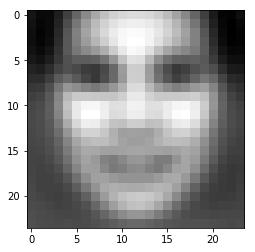

In [84]:
# Load face dataset
X = np.genfromtxt("faces.txt",delimiter=None)

# Remove the mean
mu = np.mean(X,axis=0) #find mean face
X0 = X-mu #subtract mean face

# Plot the mean face
plt.figure()
mean_face = np.reshape(mu, (24,24))
plt.imshow(mean_face.T, cmap="gray")

## Part 2: SVD

In [111]:
U, S, V = linalg.svd(X0,full_matrices=False)
W = U.dot(np.diag(S)).dot(V)
print(W.shape, V.shape)

(4916, 576) (576, 576)


In [92]:
X.shape

(4916, 576)

## Part 3

(0, 10, 0, 3000)

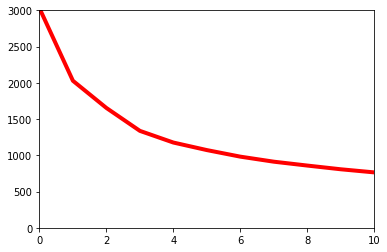

In [112]:
errors = []
for K in range(11):
    X0_hat = U[:,0:K].dot(np.diag(S[0:K])).dot(V[0:K,:])
    errors.append(np.mean((W-X0_hat) ** 2))#mse between X0 and X0_hat

plt.plot(range(11),errors,'r-',linewidth=4)
plt.axis((0,10,0,3000))

## Part 4

<Figure size 432x288 with 0 Axes>

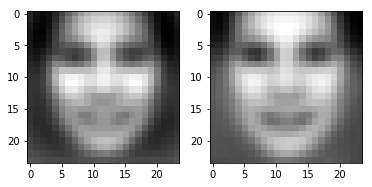

<Figure size 432x288 with 0 Axes>

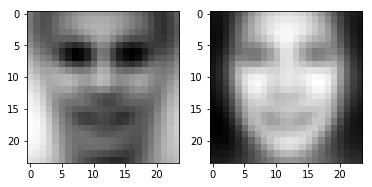

<Figure size 432x288 with 0 Axes>

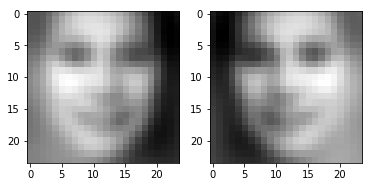

In [113]:
# Let's look at how the faces vary along each principal component
W = U.dot(np.diag(S))
for k in range(3):
    alpha = 2*np.median( np.abs( W[:,k] )); #scaler 
    im1 = np.reshape(mu + alpha*V[k,:],(24,24)) #add PC to the mean
    im2 = np.reshape(mu - alpha*V[k,:] ,(24,24)) #subtract PC to the mean 
    plt.figure();
    f,(ax1,ax2) = plt.subplots(1,2); 
    ax1.imshow(im1.T, cmap="gray"); 
    ax2.imshow(im2.T, cmap="gray");

## Part 5:

<Figure size 432x288 with 0 Axes>

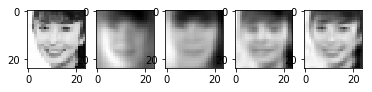

<Figure size 432x288 with 0 Axes>

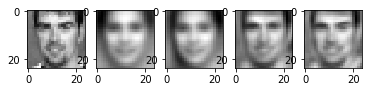

In [115]:
# Reconstruct two faces using a few components
for i in [24,35]: 
    im = X[i,:];
    im = np.reshape(im, (24,24));
    plt.figure()
    f,ax = plt.subplots(1,5);
    ax[0].imshow(im.T, cmap="gray"); #show original image 
    for j,k in enumerate([5,10,50,100]):
        im = mu+W[i:i+1,0:k].dot(V[0:k,:]) #reconstruct using k principal components 
        im = np.reshape(im,(24,24))# and reshape im to 24x24
        ax[j+1].imshow(im.T, cmap="gray");

## Part 6

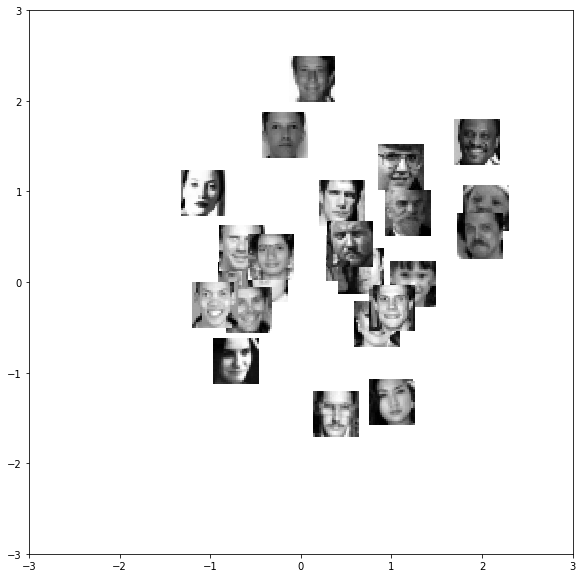

In [130]:
idx = np.random.choice(576,25)# sample 25 images without replacement using np.random.choice 
coord = StandardScaler().fit_transform(W[:, :2])
plt.figure(figsize = (10, 10))
for i in idx:
    loc = (coord[i,0],coord[i,0]+0.5, coord[i,1],coord[i,1]+0.5)# compute where to place image (scaled W values) & size 
    img = np.reshape( X[i,:], (24,24) )# reshape to square
    plt.imshow( img.T , cmap="gray", extent=loc ) # draw each image 
    plt.axis( (-3,3,-3,3) ) # set axis to a reasonable scale
    

# Problem 3: Statement of Collaboration 

For doing Homework 4, I use the discussion file as the guide and follow the instruction step by step. Also, I checked the piazza question posts for doing problem 2.4 and 2.5. I went to a study group with Wanjing Zhang and Jiaxiang Wang to discuss the details.